In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
import matplotlib.dates as mdates


**What This Code Does**  

Filters data to only include one reagent master lot.  

Plots test results over time to visualize trends.  

Computes and plots a rolling average to detect gradual shifts.  

Performs a Fourier Transform (FFT) to analyze periodic fluctuations. 
 


In [30]:
# Load dataset
file_path = "/Users/abalusawudu/Desktop/Capstone/Capstone-Project/Alinity_dataset_original.csv"
df = pd.read_csv(file_path)

# Convert timestamp column to datetime format
df['datetimestamplocal'] = pd.to_datetime(df['datetimestamplocal'], errors='coerce')


# Drop rows with missing test results
df = df.dropna(subset=['correctedcount'])

# Sort data by timestamp
df = df.sort_values(by='datetimestamplocal')

# Get unique reagent master lot numbers
unique_lots = df['reagentmasterlotnumber'].unique()

print(f"Total reagent master lots: {len(unique_lots)}")


Total reagent master lots: 664


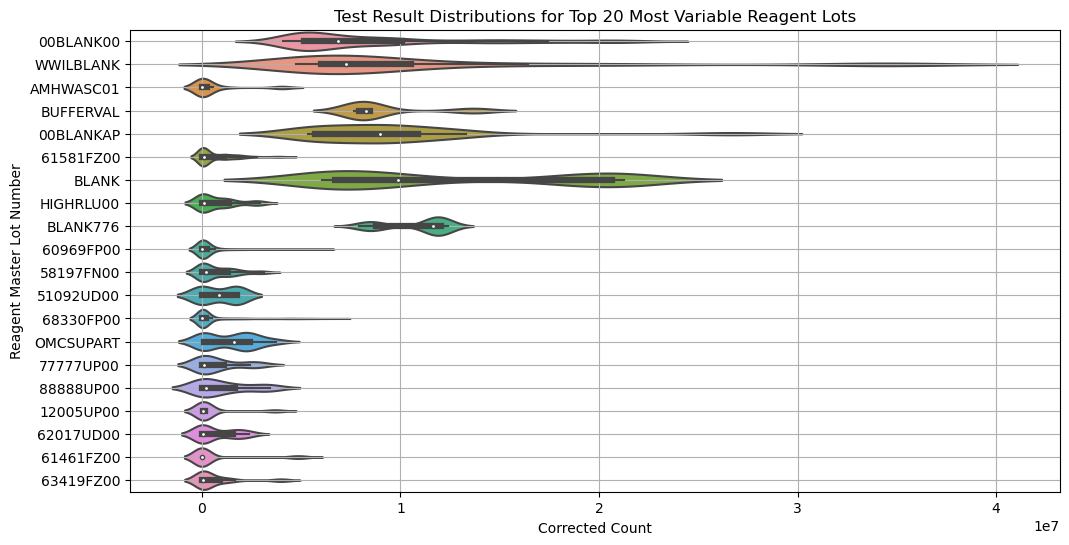

In [31]:
# Compute standard deviation per reagent lot
lot_variability = df.groupby('reagentmasterlotnumber')['correctedcount'].std().sort_values(ascending=False)

# Select the top 20 most variable reagent lots
top_lots = lot_variability.head(20).index

# Filter data for top 20 most variable reagent lots
df_top_lots = df[df['reagentmasterlotnumber'].isin(top_lots)]


plt.figure(figsize=(12, 6))
sns.violinplot(y=df_top_lots['reagentmasterlotnumber'], x=df_top_lots['correctedcount'], scale="width")
plt.xlabel("Corrected Count")
plt.ylabel("Reagent Master Lot Number")
plt.title("Test Result Distributions for Top 20 Most Variable Reagent Lots")
plt.grid()
plt.show()



## Graph interpretation

### **Some lots have wide distributions (high variance)**
- **Example:** `"00BLANK00"`, `"HIGHRLU00"`, `"BLANK"`
- These have **broad distributions**, indicating a **wide range of corrected count values**.

### **Some lots have very small, compact distributions**
- **Example:** `"77777UP00"`, `"51092UD00"`
- These have **very small variation**, meaning test results are **highly consistent**.

### **Outliers are present**
- Some violin plots **stretch far to the right** (e.g., `"00BLANK00"`, `"HIGHRLU00"`).
- This means there are some **extremely high corrected counts** in these lots.

### **Bimodal/Multi-modal Distributions**
- Some lots have **two or more peaks** (e.g., `"HIGHRLU00"`).
- This could mean that there are **two distinct groups of test results** for that reagent lot, possibly indicating:
  - **Different testing conditions**
  - **Equipment calibration issues**
  - **Sample contamination**


In [32]:
# Checking if any of these high-variance lots are from a specific time period
# Looks for outliers and extreme values

df_high_variance = df[df['reagentmasterlotnumber'].isin(["00BLANK00", "HIGHRLU00", "BLANK", "00BLANKAP", "WWILBLANK"])]

df_high_variance.groupby("reagentmasterlotnumber")['correctedcount'].describe()


,count,mean,std,min,25%,50%,75%,max
reagentmasterlotnumber,,,,,,,,
00BLANK00,1104.0,8.838659e+06,4.888031e+06,4099672.0,5120623.00,6856874.0,10055977.25,22070731.0
00BLANKAP,187.0,9.688190e+06,4.920816e+06,5352870.0,5701237.50,8997117.0,10899503.00,26753818.0
BLANK,116.0,1.274978e+07,6.368682e+06,6043514.0,6713286.25,9880274.5,20637744.25,21250198.0
HIGHRLU00,63.0,7.978570e+05,9.699908e+05,366.0,14104.50,108334.0,1352496.00,2944793.0
WWILBLANK,235.0,1.108807e+07,8.765914e+06,4728703.0,5978691.00,7244554.0,10513358.00,35196119.0


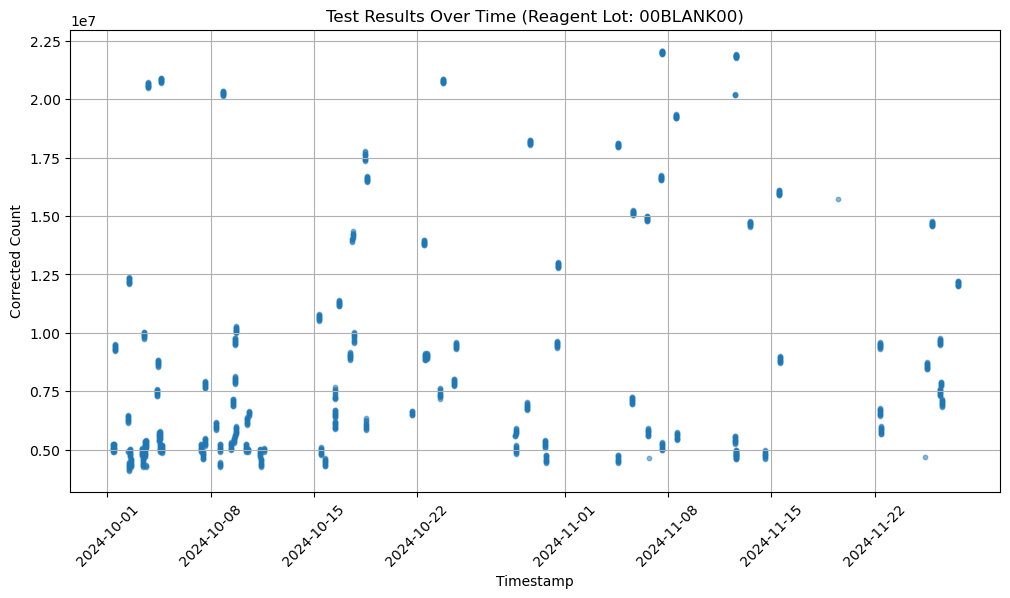

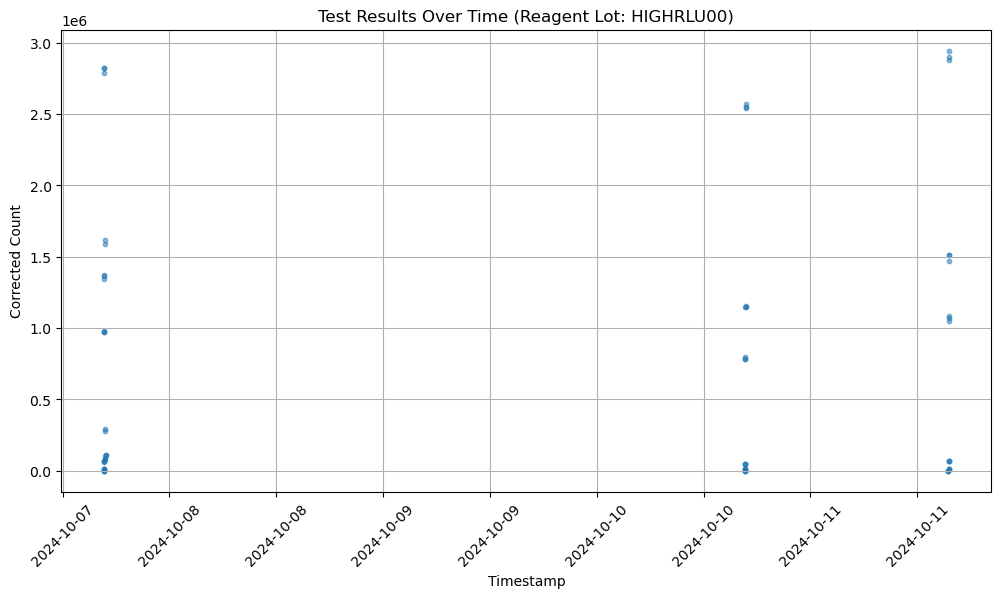

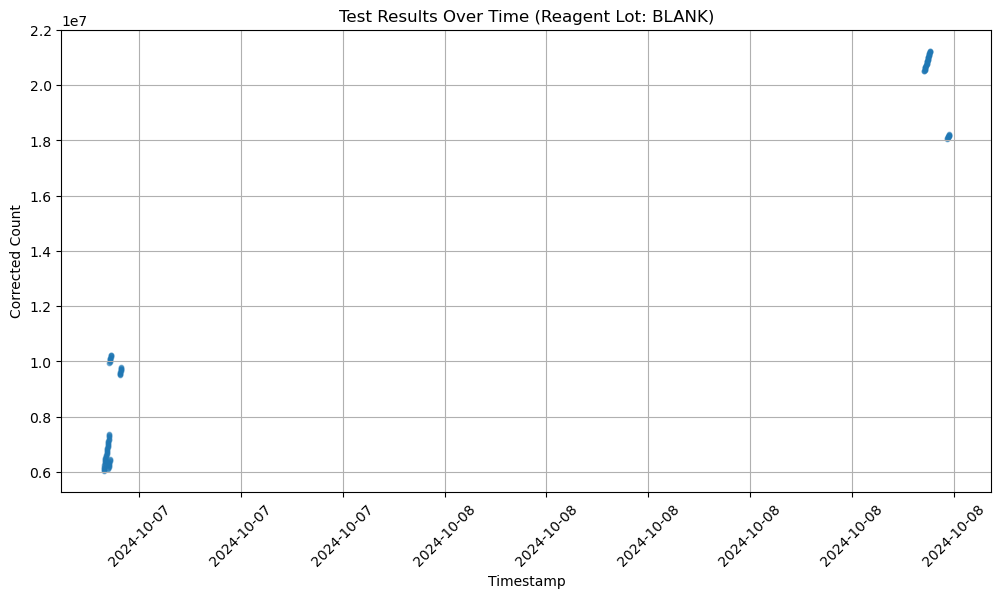

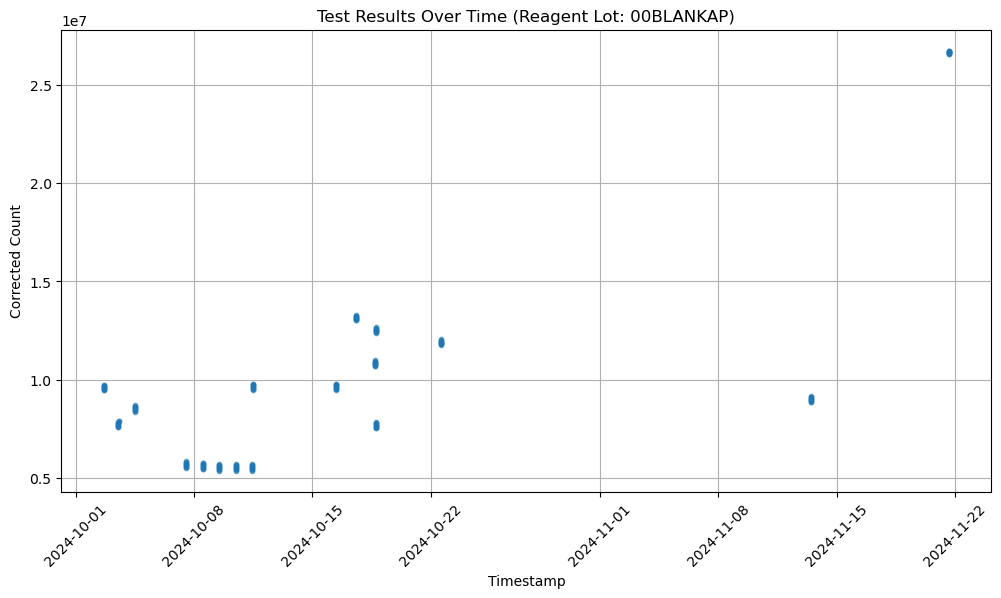

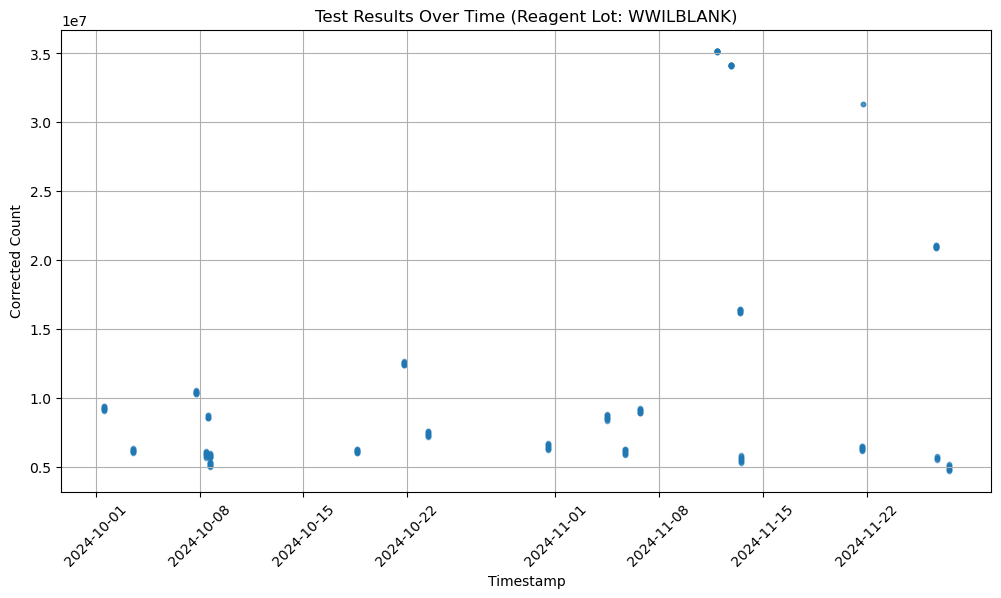

In [33]:
# Plot test results over time for the most variable lots.
# Do certain time periods have higher variability?
# Are there spikes or abnormal clusters at specific dates?

for lot in ["00BLANK00", "HIGHRLU00", "BLANK", "00BLANKAP", "WWILBLANK"]:
    df_filtered = df[df['reagentmasterlotnumber'] == lot]

    plt.figure(figsize=(12, 6))
    plt.scatter(df_filtered['datetimestamplocal'], df_filtered['correctedcount'], alpha=0.5, s=10)

    plt.xlabel("Timestamp")
    plt.ylabel("Corrected Count")
    plt.title(f"Test Results Over Time (Reagent Lot: {lot})")

    # Set major ticks to be every X days (change '7D' to adjust)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.grid()
    plt.show()




## Identify Trends with Rolling Averages

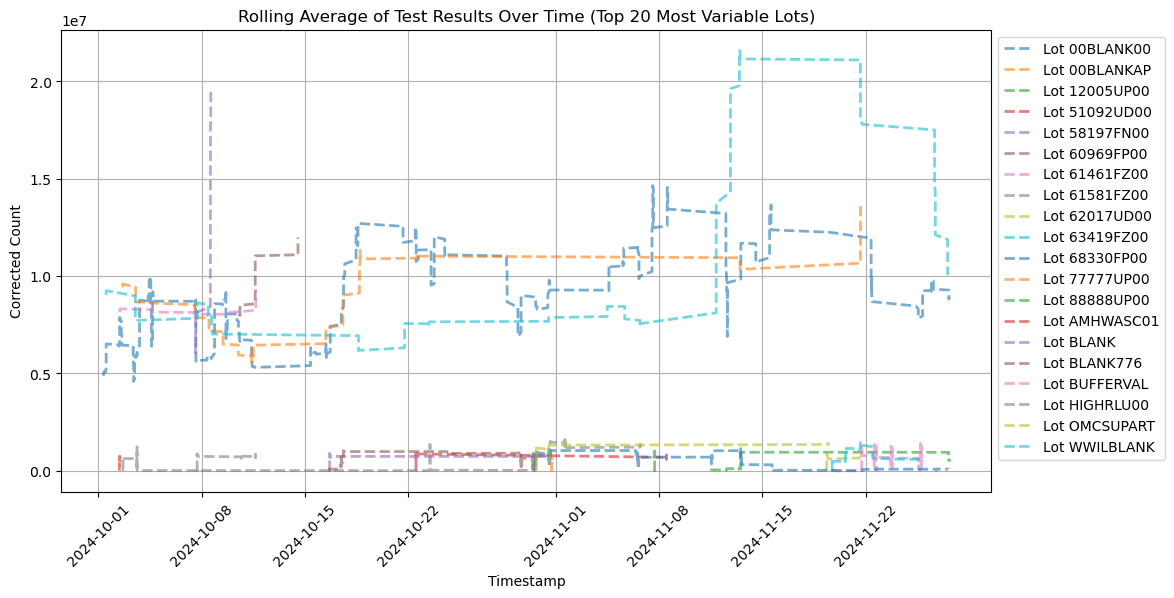

In [42]:
plt.figure(figsize=(12, 6))

for lot, df_lot in df[df['reagentmasterlotnumber'].isin(top_lots)].groupby('reagentmasterlotnumber'):
    df_lot = df_lot.sort_values('datetimestamplocal')  # Ensure correct order
    df_lot['rolling_avg'] = df_lot['correctedcount'].rolling(window=50, min_periods=1).mean()

    plt.plot(df_lot['datetimestamplocal'], df_lot['rolling_avg'], linewidth=2, alpha=0.6, linestyle="--", label=f"Lot {lot}")

plt.xlabel("Timestamp")
plt.ylabel("Corrected Count")
plt.title("Rolling Average of Test Results Over Time (Top 20 Most Variable Lots)")

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside for clarity
plt.grid()
plt.show()


In [ ]:
Old code below

In [ ]:
# Load the dataset
file_path = "/Users/abalusawudu/Desktop/Capstone/Capstone-Project/Alinity_dataset_original.csv"
df = pd.read_csv(file_path)

# Convert the correct timestamp column to datetime format
df['datetimestamplocal'] = pd.to_datetime(df['datetimestamplocal'])

# Drop rows with missing test results
df = df.dropna(subset=['correctedcount'])

# Sort the data by timestamp
df = df.sort_values(by='datetimestamplocal')

# Get unique reagent master lot numbers
unique_lots = df['reagentmasterlotnumber'].unique()

# nunique_lots = df['reagentmasterlotnumber'].nunique()

# print(nunique_lots)

# # Iterate through each reagent master lot number and generate plots
for lot in unique_lots:
    df_filtered = df[df['reagentmasterlotnumber'] == lot]

    # Skip if there's insufficient data for analysis
    if df_filtered.shape[0] < 10:
        continue

    # Plot test results over time (Filtered by reagent lot)
    plt.figure(figsize=(12, 6))
    plt.scatter(df_filtered['datetimestamplocal'], df_filtered['correctedcount'], alpha=0.5, s=10)
    plt.xlabel("Timestamp")
    plt.ylabel("Test Result (Corrected Count)")
    plt.title(f"Test Results Over Time (Reagent Lot: {lot})")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    # Compute and plot a rolling average (50-sample window) for filtered data
    df_filtered['rolling_avg'] = df_filtered['correctedcount'].rolling(window=50, min_periods=1).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered['datetimestamplocal'], df_filtered['correctedcount'], alpha=0.4, label="Raw Data")
    plt.plot(df_filtered['datetimestamplocal'], df_filtered['rolling_avg'], color='red', label="Rolling Average (50 Samples)")
    plt.xlabel("Timestamp")
    plt.ylabel("Test Result (Corrected Count)")
    plt.title(f"Rolling Average of Test Results Over Time (Reagent Lot: {lot})")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform Fourier Transform to detect periodic trends
    df_filtered['time_seconds'] = (df_filtered['datetimestamplocal'] - df_filtered['datetimestamplocal'].min()).dt.total_seconds()

    signal_filtered = df_filtered['correctedcount'].values
    N_filtered = len(signal_filtered)

    if N_filtered < 2:  # Avoid FFT on very small datasets
        continue

    freqs_filtered = np.fft.fftfreq(N_filtered, d=(df_filtered['time_seconds'].max() - df_filtered['time_seconds'].min()) / N_filtered)
    fft_values_filtered = np.abs(fft(signal_filtered))

    # Plot FFT result for filtered data
    plt.figure(figsize=(12, 6))
    plt.plot(freqs_filtered[:N_filtered // 2], fft_values_filtered[:N_filtered // 2])  # Only positive frequencies
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title(f"Fourier Transform of Test Results (Reagent Lot: {lot})")
    plt.grid()
    plt.show()